In [34]:
# Install a pip package in the current Jupyter kernel - https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys
!{sys.executable} -m pip install matplotlib numpy networkx
# !{sys.executable} -m pip install --config-setting=="--include-path=/opt/homebrew/include/graphviz" --config-setting="--library-path=/opt/homebrew/lib/graphviz" pygraphviz

#    \
#    --global-option=build_ext \
#    --global-option="-I$(brew --prefix graphviz)/include/" \
#    --global-option="-L$(brew --prefix graphviz)/lib/" \
#    pygraphviz


16699.04s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Plot the lineage tree of a whole evorun, and the lineage tree of a single leaf cell; one current elite.

In [20]:
import json
#json_file_path = '/Users/bthj/QD/conf-duration_delta_pitch_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685973719958.json'
# json_file_path = '/Users/bthj/QD/conf-static_mutation_rate_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685973723978.json'
json_file_path = '/Users/bthj/QD/conf-static_mutation_rate_combinations/evolution-run-analysis_lineage_step-1_thrshld_0.5_1685981085485.json'
x_multiplier = 1000  # Set this value as the step size in the JSON file name

# Read data from JSON file
def read_data_from_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

# Read data from JSON file
data = read_data_from_json(json_file_path)

In [21]:
lineage = average_champion_count = data['evoRuns'][0]['iterations'][0]['lineage']

Plot lineage for all classes. TODO: is that even possible or useful?

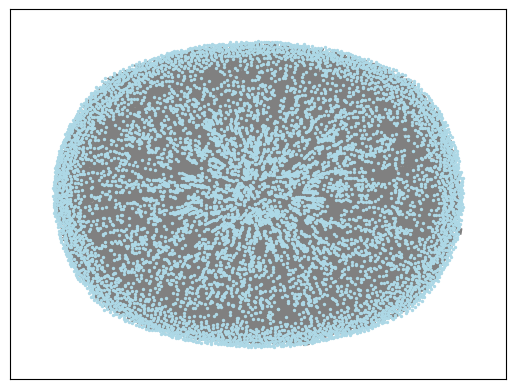

In [22]:
import matplotlib.pyplot as plt
import json
import networkx as nx

def plot_lineage_tree(data):
    graph = nx.MultiDiGraph()

    for node in data:
        node_id = node['id']
        parents = node.get('parents', [])
        graph.add_node(node_id)
        for parent in parents:
            graph.add_edge(parent['genomeId'], node_id)

    pos = nx.layout.spring_layout(graph)
    nx.draw_networkx(graph, pos, with_labels=False, node_size=2, font_size=10, node_color='lightblue', edge_color='gray')
    plt.show()

# Example JSON structure with multiple parents
json_data = """
[
    {"id": 1, "parents": []},
    {"id": 2, "parents": [1]},
    {"id": 3, "parents": [1]},
    {"id": 4, "parents": [2]},
    {"id": 5, "parents": [2]},
    {"id": 6, "parents": [3, 4]}
]
"""


# Plot lineage tree with multiple parents
plot_lineage_tree(lineage)


Plot lineage for only one child / class.

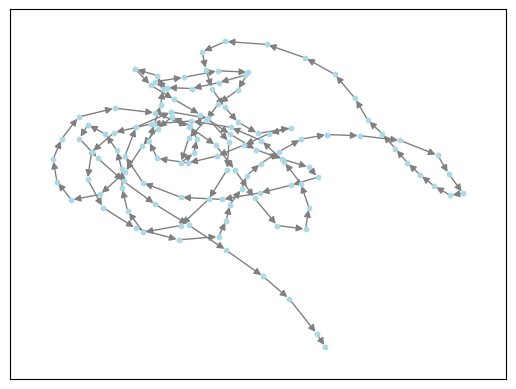

In [24]:
import matplotlib.pyplot as plt
import json
import networkx as nx

def plot_lineage_tree_for_one_child(data, target_child_id):
    graph = nx.MultiDiGraph()
    explored = set()

    def traverse_lineage(node_id):
        if node_id in explored:
            return

        explored.add(node_id)
        node = next((node for node in data if node['id'] == node_id), None)
        if node:
            graph.add_node(node_id)
            for parent in node.get('parents', []):
                graph.add_edge(parent['genomeId'], node_id)
                traverse_lineage(parent['genomeId'])
                # graph.add_edge(parent, node_id)
                # traverse_lineage(parent)

    traverse_lineage(target_child_id)

    pos = nx.layout.spring_layout(graph)
    nx.draw_networkx(graph, pos, with_labels=False, node_size=10, font_size=10, node_color='lightblue', edge_color='gray')
    plt.show()

# Example JSON structure with multiple parents
json_data = """
[
    {"id": 1, "parents": []},
    {"id": 2, "parents": [1]},
    {"id": 3, "parents": [1]},
    {"id": 4, "parents": [2]},
    {"id": 5, "parents": [2]},
    {"id": 6, "parents": [3, 4]}
]
"""

# json_data_parsed = json.loads(json_data)

# Plot lineage tree for target child node with ID 
# plot_lineage_tree_for_one_child(json_data_parsed, 6)
plot_lineage_tree_for_one_child(lineage, "01GZHG4YZTGMCFZ78C18TSGBCM")


In [30]:
import matplotlib.pyplot as plt
import json
import networkx as nx
import pygraphviz

def plot_lineage_tree(data, target_child_id):
    graph = nx.MultiDiGraph()
    explored = set()

    def traverse_lineage(node_id, level):
        if node_id in explored:
            return

        explored.add(node_id)
        node = next((node for node in data if node['id'] == node_id), None)
        if node:
            graph.add_node(node_id)
            for parent in node.get('parents', []):
                graph.add_edge(parent, node_id)
                traverse_lineage(parent, level+1)

    traverse_lineage(target_child_id, 0)

    # Arrange the graph in a top-down layout
    pos = nx.nx_agraph.graphviz_layout(graph, prog='dot', args='-Grankdir=BT')

    nx.draw_networkx(graph, pos, with_labels=True, node_size=1000, font_size=10, node_color='lightblue', edge_color='gray')
    plt.show()

# Example JSON structure with multiple parents
json_data = """
[
    {"id": 1, "parents": []},
    {"id": 2, "parents": [1]},
    {"id": 3, "parents": [1]},
    {"id": 4, "parents": [2]},
    {"id": 5, "parents": [2]},
    {"id": 6, "parents": [3, 4]}
]
"""

# Convert JSON string to Python object
data = json.loads(json_data)

# Plot lineage tree for target child node with ID 6 in a top-down fashion
plot_lineage_tree(data, 6)


ModuleNotFoundError: No module named 'pygraphviz'

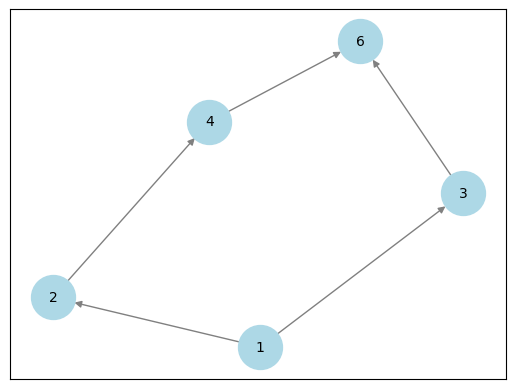

In [16]:
def plot_lineage_tree_spring_layout(data, target_child_id):
    graph = nx.MultiDiGraph()
    explored = set()

    def traverse_lineage(node_id, level):
        if node_id in explored:
            return

        explored.add(node_id)
        node = next((node for node in data if node['id'] == node_id), None)
        if node:
            graph.add_node(node_id)
            for parent in node.get('parents', []):
                graph.add_edge(parent, node_id)
                traverse_lineage(parent, level+1)

    traverse_lineage(target_child_id, 0)

    # Arrange the graph using spring layout
    pos = nx.spring_layout(graph, seed=42)

    nx.draw_networkx(graph, pos, with_labels=True, node_size=1000, font_size=10, node_color='lightblue', edge_color='gray')
    plt.show()

# Example JSON structure with multiple parents
json_data = """
[
    {"id": 1, "parents": []},
    {"id": 2, "parents": [1]},
    {"id": 3, "parents": [1]},
    {"id": 4, "parents": [2]},
    {"id": 5, "parents": [2]},
    {"id": 6, "parents": [3, 4]}
]
"""

# Convert JSON string to Python object
data = json.loads(json_data)

# Plot lineage tree for target child node with ID 6 in a top-down fashion
plot_lineage_tree_spring_layout(data, 6)